In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./engineered_dataset.csv')
df.head()

,timestamp,cc_num,merchant,category,amt,first,last,gender,street,city,...,per_month,spend_ratio,delta_between_transactions,out_of_close_range,7d_rolling_amt,amt_vs_avg,price_to_distance,night_entertainment,is_holiday,holiday_spender
0,2019-01-01 00:00:00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,15768.079626,0.832496,0,0,4.97,0.056006,391.505889,False,1,0
1,2019-01-01 00:00:00,36078114201167,fraud_Murray-Smitham,grocery_pos,159.54,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,4506.352539,0.039278,0,0,159.54,2.577281,5730.846863,False,1,1
2,2019-01-01 00:00:00,3567527758368741,fraud_Beier LLC,entertainment,4.01,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,14205.468703,0.001615,0,0,4.01,0.055771,304.725259,True,1,0
3,2019-01-01 00:00:00,4026222041577,"fraud_Huel, Hammes and Witting",grocery_pos,195.22,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,23150.221760,0.076880,0,0,195.22,2.139835,16843.004857,False,1,1
4,2019-01-01 00:00:00,341546199006537,"fraud_Bins, Balistreri and Beatty",shopping_pos,268.16,Mark,Brown,M,8580 Moore Cove,Wales,...,111358.991449,0.021651,0,0,268.16,4.134283,20364.973502,True,1,1


In [3]:
df.describe(include="all")

,timestamp,cc_num,merchant,category,amt,first,last,gender,street,city,...,per_month,spend_ratio,delta_between_transactions,out_of_close_range,7d_rolling_amt,amt_vs_avg,price_to_distance,night_entertainment,is_holiday,holiday_spender
count,1482976,1.482976e+06,1482976,1482976,1.482976e+06,1482976,1482976,1482976,1482976,1482976,...,1.482976e+06,1.482976e+06,1482976,1482976.0,1.482976e+06,1.482976e+06,1.482976e+06,1482976,1.482976e+06,1.482976e+06
unique,3456,NaN,693,14,NaN,355,486,2,999,906,...,NaN,NaN,221,NaN,NaN,NaN,NaN,2,NaN,NaN
top,2019-12-06 23:00:00,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,372 Jeffrey Course,Birmingham,...,NaN,NaN,0 days 01:00:00,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,1688,NaN,5002,150533,NaN,30489,32715,811215,3593,6539,...,NaN,NaN,461251,NaN,NaN,NaN,NaN,1264462,NaN,NaN
mean,NaN,4.183012e+17,NaN,NaN,7.018088e+01,NaN,NaN,NaN,NaN,NaN,...,2.513699e+04,5.710571e-02,NaN,0.0,7.015890e+01,1.000000e+00,5.336469e+03,NaN,1.633594e-01,4.117612e-01
std,NaN,1.310377e+18,NaN,NaN,1.598960e+02,NaN,NaN,NaN,NaN,NaN,...,1.587243e+05,1.424982e-01,NaN,0.0,6.620638e+01,2.319570e+00,1.319969e+04,NaN,3.696933e-01,4.921525e-01
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,4.249587e+02,3.097998e-05,NaN,0.0,1.110000e+00,8.375939e-03,7.024330e-01,NaN,0.000000e+00,0.000000e+00
25%,NaN,1.800400e+14,NaN,NaN,9.660000e+00,NaN,NaN,NaN,NaN,NaN,...,4.574820e+03,4.045438e-03,NaN,0.0,4.035429e+01,1.545283e-01,7.269238e+02,NaN,0.000000e+00,0.000000e+00
50%,NaN,3.521417e+15,NaN,NaN,4.753000e+01,NaN,NaN,NaN,NaN,NaN,...,8.484653e+03,1.372523e-02,NaN,0.0,5.765000e+01,6.717497e-01,3.009426e+03,NaN,0.000000e+00,0.000000e+00
75%,NaN,4.642255e+15,NaN,NaN,8.316000e+01,NaN,NaN,NaN,NaN,NaN,...,1.713471e+04,4.031536e-02,NaN,0.0,8.030429e+01,1.186888e+00,6.437587e+03,NaN,0.000000e+00,1.000000e+00


In [4]:
legitimate_entertainment = df[(df['is_entertainment']) & (df['is_fraud'] == 0)]
print(f"Transacciones de Entretenimiento legítimas: {len(legitimate_entertainment)}")
fraudulent_entertainment = df[(df['is_entertainment']) & (df['is_fraud'] == 1)]
print(f"Transacciones de Entretenimiento fraudulentas: {len(fraudulent_entertainment)}")

legitimate = df[(df['is_fraud'] == 0)]
print(f"Transacciones legítimas: {len(legitimate)}")
fraudulent = df[(df['is_fraud'] == 1)]
print(f"Transacciones fraudulentas: {len(fraudulent)}")

Transacciones de Entretenimiento legítimas: 491070
Transacciones de Entretenimiento fraudulentas: 3408
Transacciones legítimas: 1474809
Transacciones fraudulentas: 8167


In [5]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.utils import resample

for col in df.select_dtypes(include='object').columns:
	df[col] = df[col].astype('category')

df_majority = df[df.is_fraud == 0]
df_minority = df[df.is_fraud == 1]

sample_size = int(len(df_minority) * 0.5)

df_majority_downsampled = resample(
	df_majority,
	replace=False,
	n_samples = sample_size,
	random_state=42
)

print(sample_size)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

train_df = df_balanced[df_balanced['year'] <  2020]
test_df  = df_balanced[df_balanced['year'] >= 2020]

X_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']

X_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

X_train_model = X_train.drop(columns=['is_entertainment'])
X_test_model  = X_test .drop(columns=['is_entertainment'])

train_data = lgb.Dataset(X_train_model, label=y_train)
valid_data = lgb.Dataset(X_test_model, label=y_test)

c:\Programs\Coding\Python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


4083


In [6]:
def feval_ratio_fp(preds, data):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()

	if TP == 0:
		return 'ratio_fp', float('inf'), False

	ratio_fp = (TP + FP) / TP
	return 'ratio_fp', ratio_fp, False

In [7]:
def feval_fp_penalty(preds, data, alpha=2.0):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()
	FN = ((y_true == 1) & (y_pred == 0)).sum()

	if TP == 0:
		return 'fp_penalty_f1', 0.0, True

	prec = TP / (TP + alpha * FP) if (TP + alpha * FP) > 0 else 0
	rec = TP / (TP + FN) if (TP + FN) > 0 else 0

	if prec + rec == 0:
		f1_penalized = 0.0
	else:
		f1_penalized = 2 * prec * rec / (prec + rec)

	return 'fp_penalty_f1', f1_penalized, True

In [8]:
def feval_all(preds, data):
	return [
		feval_ratio_fp(preds, data),
		feval_fp_penalty(preds, data, alpha=2.0)
	]

In [9]:
# Params
params = {
	'min_child_samples': 150,
	'boosting_type': 'gbdt',
	'class_weight': 'balanced',
	'objective': 'binary',
	'learning_rate': 0.01,
	'num_leaves': 25,
	'verbose': -1,
	'metric': 'auc'
}

# Modelo

In [10]:
# Train
model = lgb.train(
	params,
	train_data,
	valid_sets=[valid_data],
	num_boost_round=2000,
	feval = feval_fp_penalty,
	callbacks=[
		lgb.early_stopping(100),
		lgb.log_evaluation(100)
	]
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.989423	valid_0's fp_penalty_f1: 0.939992
[200]	valid_0's auc: 0.991737	valid_0's fp_penalty_f1: 0.955773
[300]	valid_0's auc: 0.99357	valid_0's fp_penalty_f1: 0.963799
[400]	valid_0's auc: 0.993861	valid_0's fp_penalty_f1: 0.967734
Early stopping, best iteration is:
[399]	valid_0's auc: 0.993863	valid_0's fp_penalty_f1: 0.966976


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

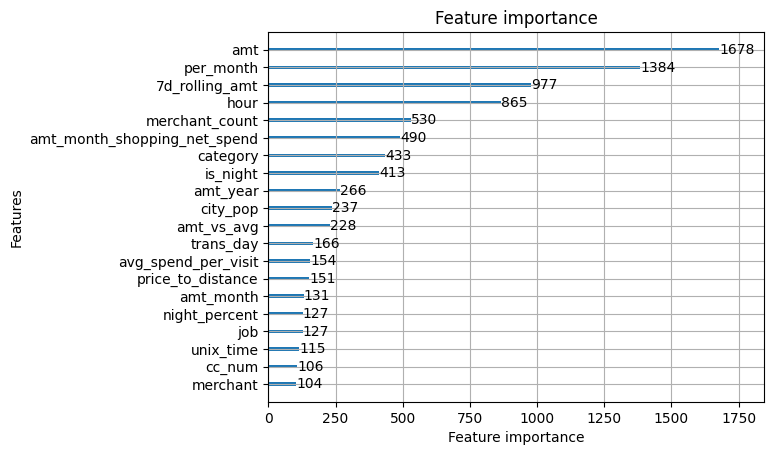

In [11]:
lgb.plot_importance(model, max_num_features=20)

# Métricas y Comparaciones

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1979
           1       0.98      0.97      0.98      3805

    accuracy                           0.97      5784
   macro avg       0.96      0.97      0.97      5784
weighted avg       0.97      0.97      0.97      5784

--- Confusion Matrix ---
AUC: 99.3863%


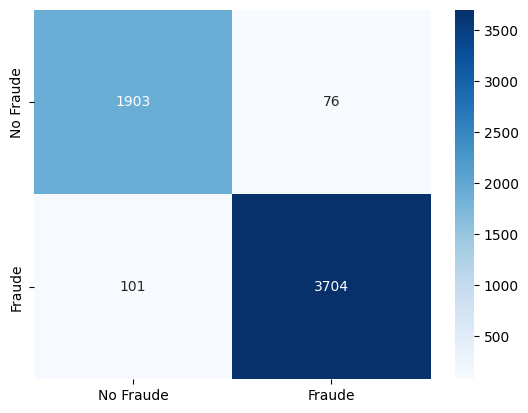

In [12]:
y_pred_proba = model.predict(X_test_model)
y_pred = (y_pred_proba > 0.5).astype(int)
fp_mask = (y_test == 0) & (y_pred == 1)
fp_count_entertainment = fp_mask[X_test['is_entertainment'] == True].sum()
fp_total = fp_mask.sum()

print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("--- Confusion Matrix ---")
sns.heatmap(confusion_matrix(y_test, y_pred), 
	annot=True, fmt='d', cmap='Blues',
	xticklabels=['No Fraude', 'Fraude'],
	yticklabels=['No Fraude', 'Fraude'])

print(f"AUC: {roc_auc_score(y_test, y_pred_proba) * 100:.4f}%")

In [20]:
print(f"False Positives (Entertainment): {fp_count_entertainment}")
print(f"Total False Positives: {fp_total}")

entertainment_ratio = fp_count_entertainment/fp_total*100
original_data_ratio = len(fraudulent_entertainment)/len(fraudulent)*100
print(f"\nEntertainment Ratio: {entertainment_ratio:.2f}%")
print(f"Original Data Ratio: {original_data_ratio:.2f}%")

print(f"\nImprovement sobre el modelo base: {(original_data_ratio / entertainment_ratio - 1) * 100:.2f}%")

mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = mat.ravel()

print(f"\nAccurracy: {(1 - fp_count_entertainment/(tn+ fp + fn + tp)) * 100:.2f}%")

False Positives (Entertainment): 29
Total False Positives: 76

Entertainment Ratio: 38.16%
Original Data Ratio: 41.73%

Improvement sobre el modelo base: 9.36%

Accurracy: 99.50%
